In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from numpy.linalg import inv
%matplotlib inline

In [50]:
def f(x):
  prob = np.exp(-x) - np.sin(x)
  return prob
def f_p(x):
  prob_p = -1*np.exp(-x) - np.cos(x)
  return prob_p
def f_2p(x):
  return np.exp(-x)+np.sin(x)

In [51]:
#Question 1
# NMR to find the smallest positive zero of (e^-x) - sinx
# Bisection method
An = 0
Bn = 1
a =[]
b =[]
c =[]
for i in range(3):
  a.append(An)
  b.append(Bn)
  Cn = An + (Bn-An)/2
  c.append(Cn)
  if (f(An) * f(Cn))<0:
    Bn = Cn
  else:
    An = Cn

print("Cn =", Cn)

def out(x,errs):
  rat = errs[-1]/(errs[-2] * errs[-2])
  print(f"Iteration {it} | x{it-1} = {x[-2]}\t| x{it} = {x[-1]}\t| Error = {errs[-1]}\t| Ratio = {rat}")

x = [Cn]
Xn = Cn
epsilon = abs(f(Cn))
errs = [epsilon]
precision = 1e-5
it = 1


while(precision < epsilon):
  # NRM starts by calculating the gradients
  Xn = Xn -(f(Xn) / f_p(Xn))
  epsilon = abs(f(Xn))
  x.append(Xn)
  errs.append(epsilon)
  out(x, errs)
  it += 1

Cn = 0.625
Iteration 1 | x0 = 0.625	| x1 = 0.5879810312888636	| Error = 0.0007653378309184777	| Ratio = 0.30815522679844287
Iteration 2 | x1 = 0.5879810312888636	| x2 = 0.5885326222081458	| Error = 1.688876488659119e-07	| Ratio = 0.2883311256186911


Prod =  -0.47359154363645417


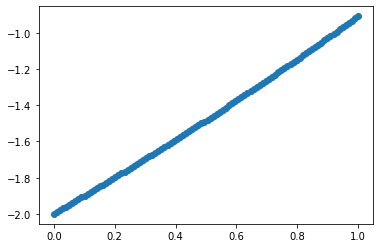

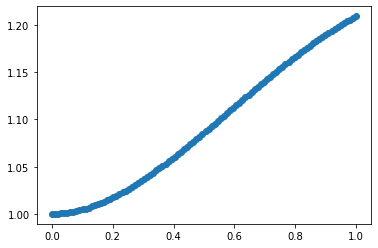

0.5
0.5214722110196883


In [52]:
#Verifying the order of convergence
m = 0
n = 1
# Condition 1 f(m)*f(n)<0
prod = f(m) * f(n)
print("Prod = ",prod)
# Condition 2
#f'(x)!=0 for all x in the range [m,n]
x=np.linspace(m,n,100)
y=f_p(x)
plt.scatter(x,y)
plt.show()
#Condition 3
# f'(x) !=0 in [m,n] and f''(x) takes only positive values.
y1=f_2p(x)
plt.scatter(x,y1)
plt.show()
#Condition 4
# abs(f(a)/f'(a))<b-a and abs(f(b)/f'(b))<b-a
print(abs(f(m))/abs(f_p(m)))
print(abs(f(n))/abs(f_p(n)))

In [53]:
# Question2 
## Code to find the solution of the non-linear system:
# sin(xy) + x-y = 0
# ycos(xy) + 1 = 0
# [x0,y0] = [1,2]

In [54]:
"""
Creating all the functions and derivative functions
"""
def f(x,y):
  f_1 = math.sin(x*y) + x-y
  f_2 = y*math.cos(x*y) + 1
  out = np.array([[f_1] , [f_2]])
  return out
def J(x,y):
  df1_dx = y * math.cos(x*y) + 1
  df1_dy = x * math.cos(x*y) - 1
  df2_dx = -1* math.sin(x*y) *y*y
  df2_dy = math.cos(x*y) - x*y*math.sin(x*y)
  out = np.array([[df1_dx , df1_dy] , [df2_dx , df2_dy]])
  return out  

Epsilon =  0.1342793568131237
Iteration = 0 : Xn =  1 Yn =  2
Epsilon =  0.008145022760953217
Iteration = 1 : Xn =  1.0796647596918634 Yn =  1.9453854028787396
Epsilon =  7.720275856921676e-05
Iteration = 2 : Xn =  1.0861381518715252 Yn =  1.9437137722974482


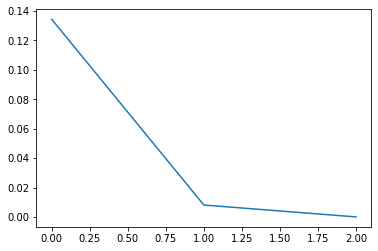

In [55]:
X = [1]
Y = [2]
Xn = 1
Yn = 2
prec = 1e-3
h = -inv(J(Xn,Yn))@f(Xn , Yn)
epsilon = abs(h[0,0]) + abs(h[1,0])
Hy = [h[1,0]]
Hx = [h[0,0]]
it = 0
print("Epsilon = " , epsilon)
print("Iteration =",it ,":","Xn = ", Xn , "Yn = ", Yn)
eps_history = []
eps_history.append(epsilon)
iter_history = []
iter_history.append(it)
while(prec < epsilon):
  it += 1
  Xn = Xn + Hx[-1]
  Yn = Yn + Hy[-1]
  X.append(Xn)
  Y.append(Yn)
  h = -inv(J(Xn,Yn))@f(Xn , Yn) 
  epsilon = abs(h[0,0]) + abs(h[1,0])
  Hx.append(h[0,0])
  Hy.append(h[1,0])
  eps_history.append(epsilon)
  iter_history.append(it)
  print("Epsilon = " , epsilon)
  print("Iteration =",it ,":","Xn = ", Xn , "Yn = ", Yn)
## Plotting the graph for epsilon uptill termination
plt.plot(iter_history , eps_history)
###End